# Summary

<p class="lead">This notebook summarizes the realtime-kinetic measurements.
</p>

## Requirement

Before running this notebook, you need to pre-process the data with:

- [1-spot bubble-bubble kinetics - Run-All](1-spot bubble-bubble kinetics - Run-All.ipynb)

This pre-processing analyzes all measurement data files, 
compute the moving-window slices, the number of bursts 
and fits the population fractions. All results are saved as TXT in 
the [results](results) folder.

The present notebook loads these results and presents a summary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\laser2002j\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import analysis

numpy: 1.10.1
numba: 0.23.0
lmfit: 0.9.2


In [3]:
# path = Path('./data/singlespot/')
# filenames = list(f.stem for f in path.glob('**/*.sm'))
# filenames

In [4]:
filenames = [
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1',
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2',
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3',
     '004TAmin8_NTDmin5_kinetics_ITC2_to_runoff_T37C',
     '005TAmin8_NTDmin5_kinetics_ITC7_to_runoff_T37C',
     '006TAmin8_NTDmin5_kinetics_RDE11_to_runoff_T37C',
     '007TAmin8_NTDmin5_kinetics_ITC4_to_runoff_T37C',
     '008TAmin8_NTDmin5_kinetics_ITC2_to_ITC7_T37C',
     '009TAmin8_NTDmin5_kinetics_ITC2_to_ITC4_T37C',
     '20dT_0_hybridization_kinetics_trial_1',
     '20dT_1_DNA_20dA_RNA_hybridization_kinetics_buffer_RT',
     '20dT_2_DNA_20dA_RNA_hybridization_kinetics_0_5M_GndHCl_RT']

# Measurement 0

  PRE Number of bursts (detrended):   284.9 MEAN,    74.5 VAR,  0.262 VAR/MEAN
 POST Number of bursts (detrended):   135.2 MEAN,    19.6 VAR,  0.145 VAR/MEAN
POST2 Number of bursts (detrended):   233.0 MEAN,   588.5 VAR,  2.525 VAR/MEAN
  PRE Kinetics 30s:     3.261 STD, 0.051 STD detrended.
 POST Kinetics 30s:     6.618 STD, 4.728 STD detrended.
POST2 Kinetics 30s:     5.698 STD, 0.088 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=60s) = 68.7s  tau(w=180s) = 33.9s  Delta = 50.7%
 FIT  Window Exp (t0_vary=False):  tau(w=60s) = 109.4s  tau(w=180s) = 126.0s  Delta = -15.2%
 FIT  Simple Exp (t0_vary=True):  tau(w=60s) = 68.7s  tau(w=180s) = 33.9s  Delta = 50.7%
 FIT  Window Exp (t0_vary=True):  tau(w=60s) = 127.9s  tau(w=180s) = 138.7s  Delta = -8.4%


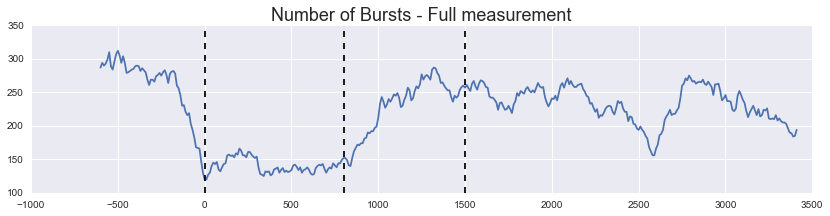

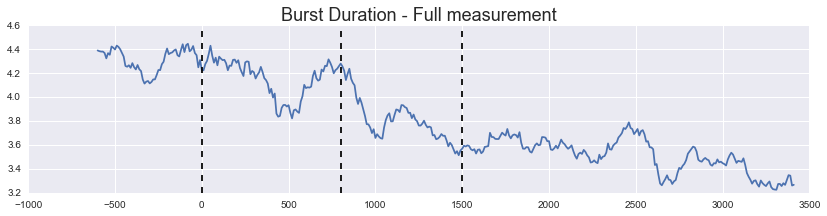

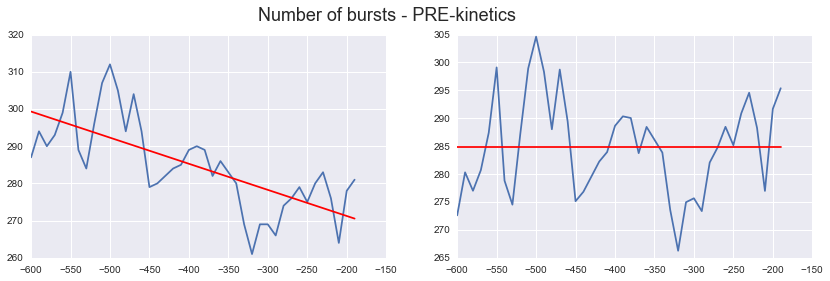

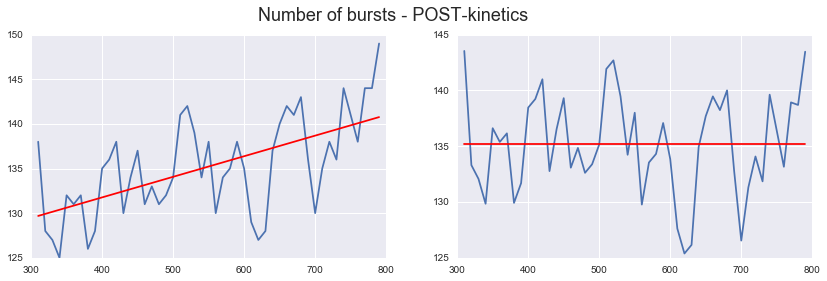

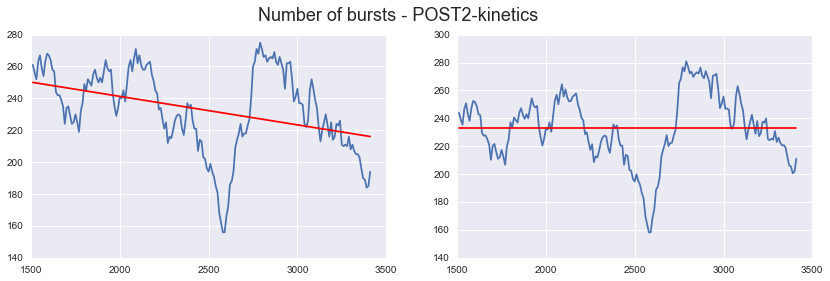

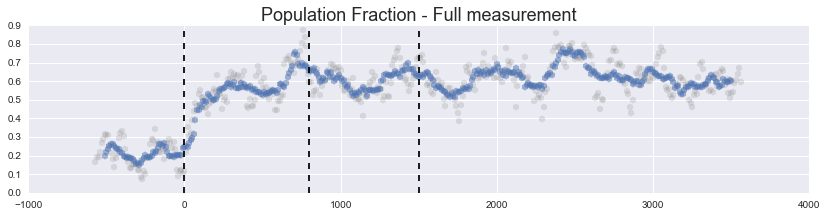

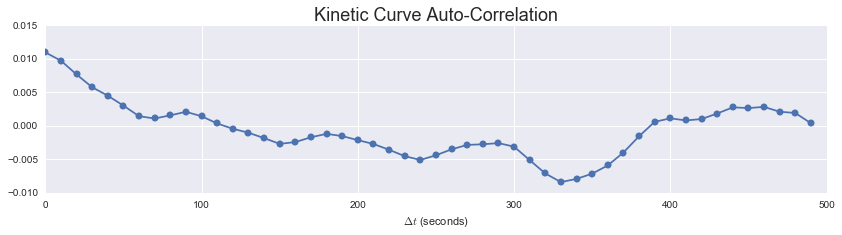

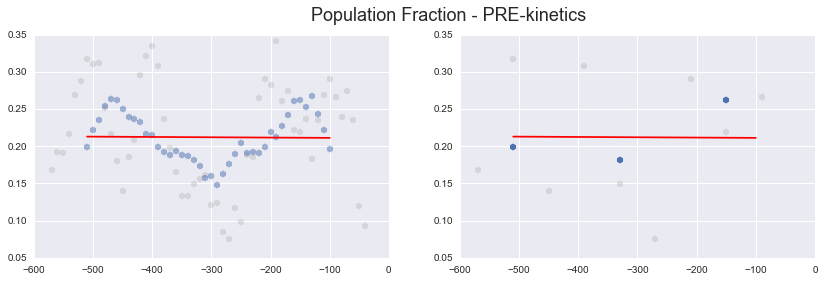

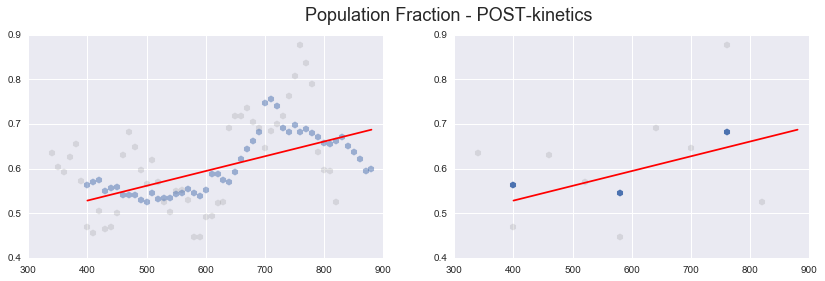

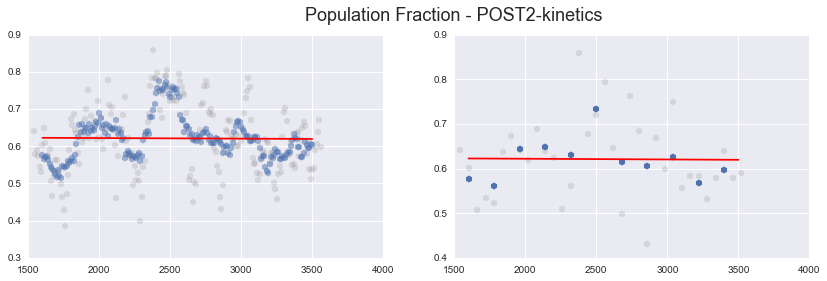

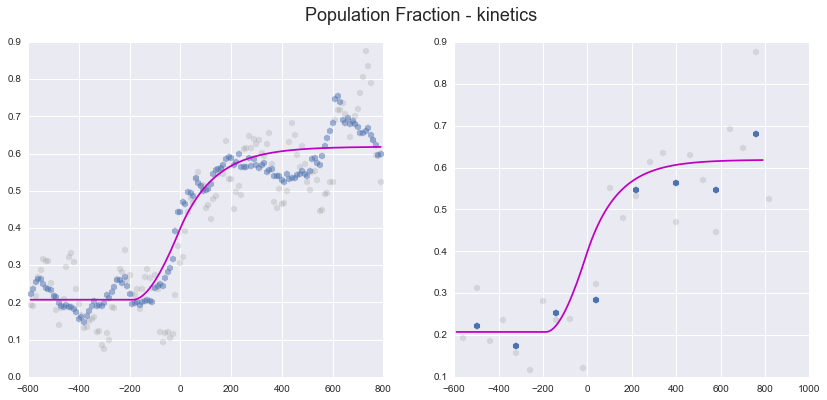

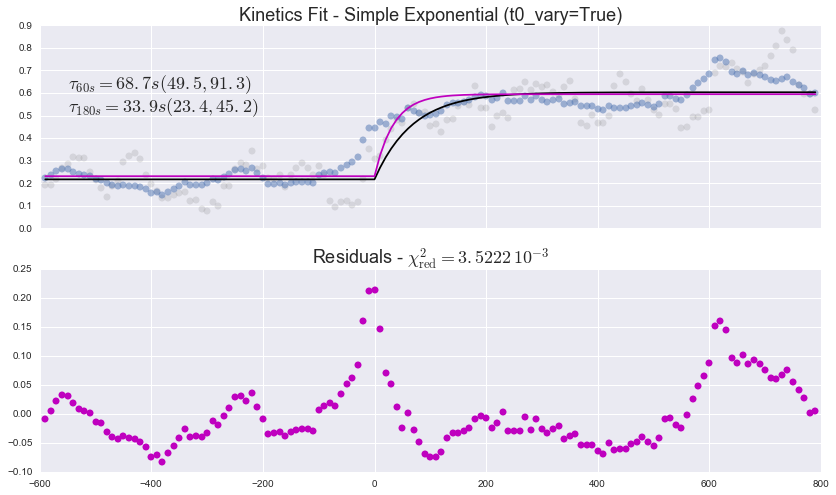

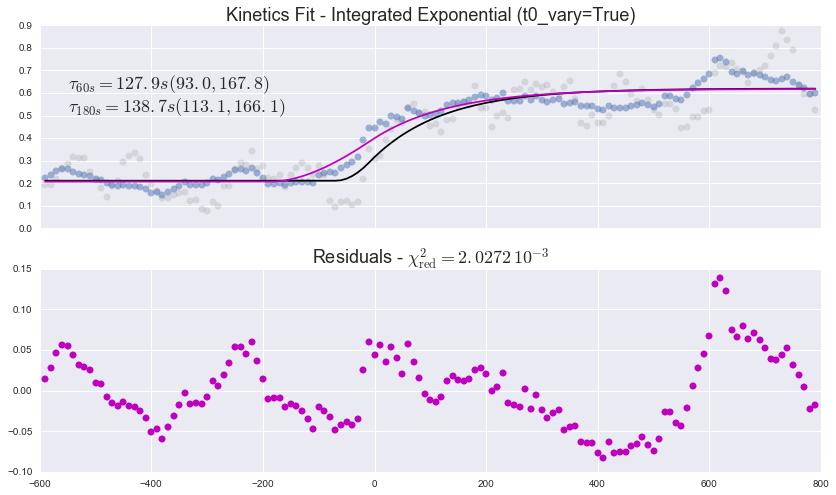

In [5]:
res, params = analysis.process(filenames[0], post = (300, 800), post2_start=1500)

In [6]:
# post = (300, 800)
# post2_start = 1500
# kin = [-600, post[1]]

# params_all = analysis.load_fit_data(filenames[0])
# params, params_pre, params_post, params_post2 = analysis.partition_fit_data(params_all, kin, post, post2_start)

In [7]:
#res

In [8]:
(res1, res2), (resw1, resw2), (ci1, ci2), (ciw1, ciw2) = res
tau1 = res1.values['tau']
tau2 = res2.values['tau']
tauw1 = resw1.values['tau']
tauw2 = resw2.values['tau']
tauw1, tauw2

(279.56309056634393, 220.99950596175594)

In [9]:
import lmfit

In [10]:
lmfit.report_fit(resw2)

[[Fit Statistics]]
    # function evals   = 79
    # data points      = 139
    # variables        = 4
    chi-square         = 0.274
    reduced chi-square = 0.002
[[Variables]]
    t_window:      180 (fixed)
    decimation:    5 (fixed)
    sigma:         0 (fixed)
    t0:           -8.00016392 +/- 14.08859 (176.10%) (init= 0)
    tau:           138.669692 +/- 20.50370 (14.79%) (init= 150)
    init_value:    0.20721731 +/- 0.006734 (3.25%) (init= 0.1)
    final_value:   0.61866327 +/- 0.008139 (1.32%) (init= 0.9)
[[Correlations]] (unreported correlations are <  0.100)
    C(t0, tau)                   = -0.809 
    C(tau, final_value)          =  0.684 
    C(t0, final_value)           = -0.394 
    C(t0, init_value)            =  0.352 
    C(tau, init_value)           = -0.135 


In [11]:
resw2.best_values

{'decimation': 5,
 'final_value': 0.61866327184381265,
 'init_value': 0.20721731243718078,
 'sigma': 0,
 't0': -8.0001639241820151,
 't_window': 180,
 'tau': 138.66969284404192}

In [12]:
lmfit.report_ci(ciw2)

                99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 t0         : -44.74257 -28.55670 -14.20965  -8.00016 +14.24989 +29.38737 +46.63774
 tau        : -75.93297 -50.39546 -25.57843 138.66969 +27.40609 +57.44197 +93.68954
 init_value :  -0.01998  -0.01306  -0.00653   0.20722  +0.00641  +0.01291  +0.01972
 final_value:  -0.02633  -0.01792  -0.00932   0.61866  +0.01026  +0.02182  +0.03589


In [13]:
import lmfit

In [14]:
lmfit.report_ci(ciw2)

                99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 t0         : -44.74257 -28.55670 -14.20965  -8.00016 +14.24989 +29.38737 +46.63774
 tau        : -75.93297 -50.39546 -25.57843 138.66969 +27.40609 +57.44197 +93.68954
 init_value :  -0.01998  -0.01306  -0.00653   0.20722  +0.00641  +0.01291  +0.01972
 final_value:  -0.02633  -0.01792  -0.00932   0.61866  +0.01026  +0.02182  +0.03589


In [15]:
p1 = params['em', 60, 10]
p2 = params['em', 180, 10]

# Measurement 1

  PRE Number of bursts (detrended):   532.8 MEAN,   606.1 VAR,  1.138 VAR/MEAN
 POST Number of bursts (detrended):   279.5 MEAN,   145.6 VAR,  0.521 VAR/MEAN
POST2 Number of bursts (detrended):   426.6 MEAN,  1082.6 VAR,  2.538 VAR/MEAN
  PRE Kinetics 30s:     1.685 STD, 0.410 STD detrended.
 POST Kinetics 30s:     3.945 STD, 1.004 STD detrended.
POST2 Kinetics 30s:     3.122 STD, 0.050 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=60s) = 125.0s  tau(w=180s) = 75.5s  Delta = 39.6%
 FIT  Window Exp (t0_vary=False):  tau(w=60s) = 154.1s  tau(w=180s) = 149.7s  Delta = 2.9%
 FIT  Simple Exp (t0_vary=True):  tau(w=60s) = 125.0s  tau(w=180s) = 75.5s  Delta = 39.6%
 FIT  Window Exp (t0_vary=True):  tau(w=60s) = 91.3s  tau(w=180s) = 79.2s  Delta = 13.3%


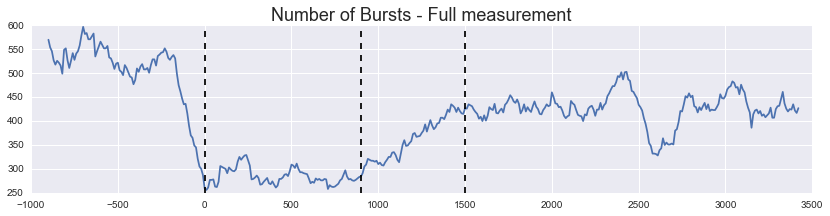

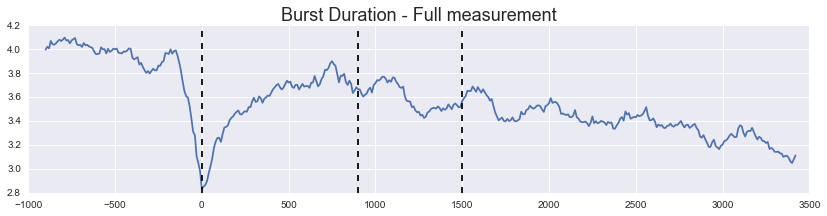

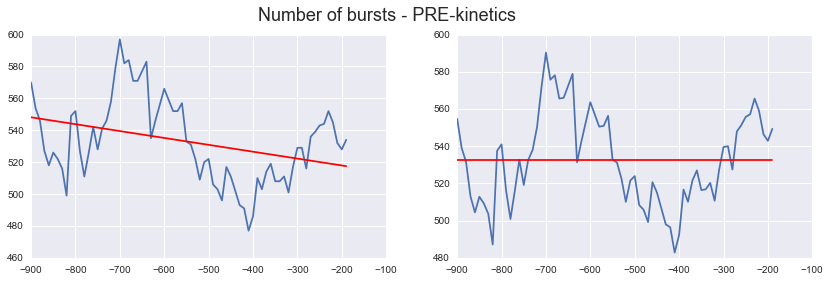

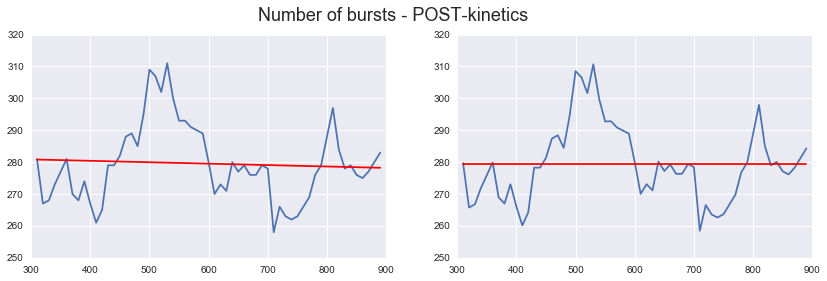

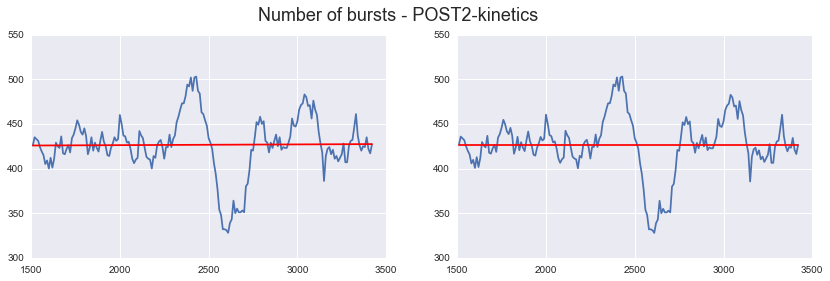

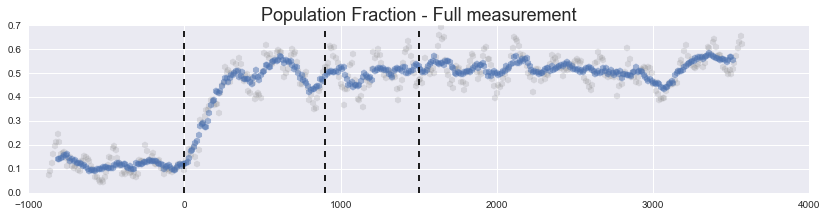

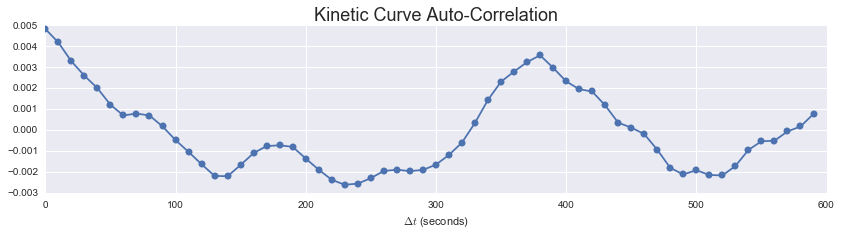

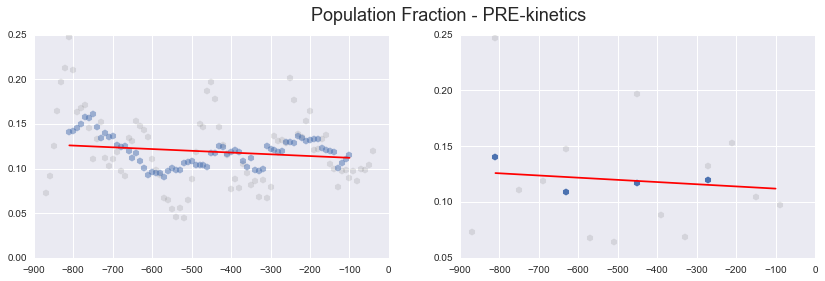

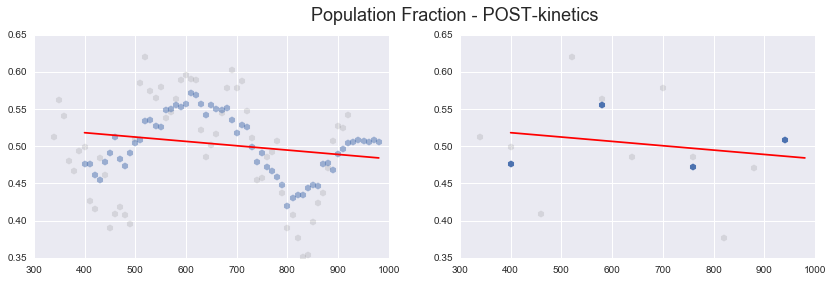

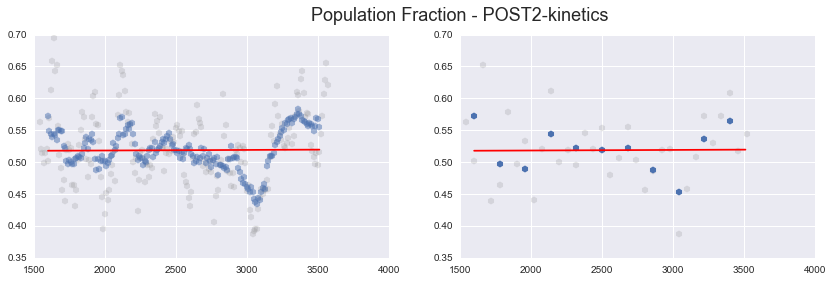

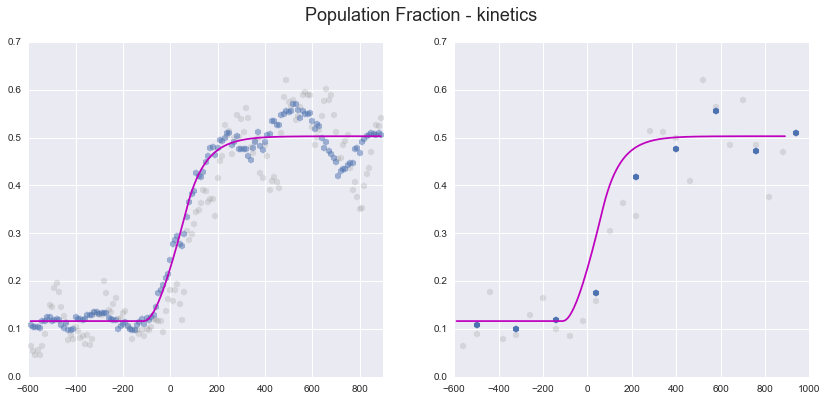

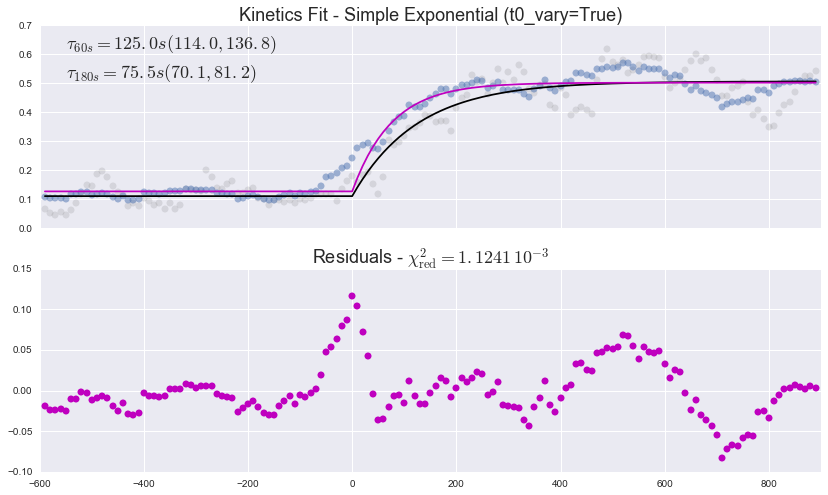

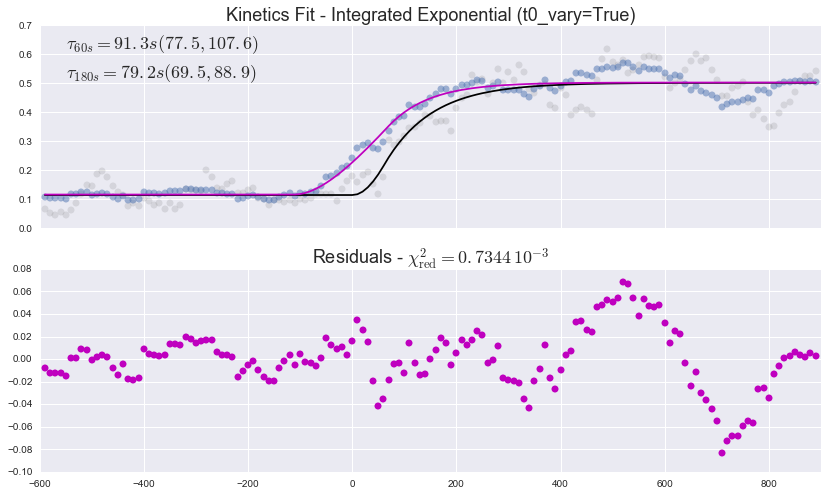

In [16]:
res, params = analysis.process(filenames[1], post = (300, 900), post2_start=1500)

# Measurement 2

  PRE Number of bursts (detrended):   891.4 MEAN,  7504.5 VAR,  8.418 VAR/MEAN
 POST Number of bursts (detrended):   404.3 MEAN,   639.7 VAR,  1.582 VAR/MEAN
POST2 Number of bursts (detrended):   526.7 MEAN,   822.0 VAR,  1.561 VAR/MEAN
  PRE Kinetics 30s:     2.602 STD, 1.820 STD detrended.
 POST Kinetics 30s:     5.299 STD, 3.974 STD detrended.
POST2 Kinetics 30s:     3.570 STD, 1.965 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=60s) = 92.6s  tau(w=180s) = 55.8s  Delta = 39.7%
 FIT  Window Exp (t0_vary=False):  tau(w=60s) = 135.8s  tau(w=180s) = 148.4s  Delta = -9.3%
 FIT  Simple Exp (t0_vary=True):  tau(w=60s) = 92.6s  tau(w=180s) = 55.8s  Delta = 39.7%
 FIT  Window Exp (t0_vary=True):  tau(w=60s) = 142.7s  tau(w=180s) = 186.5s  Delta = -30.7%


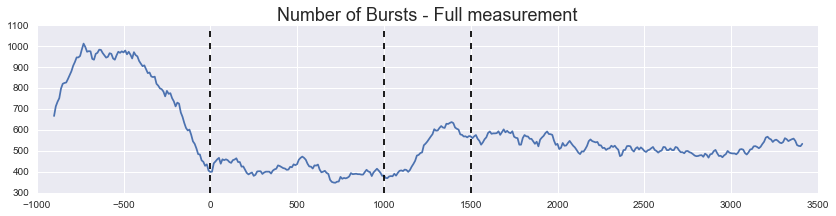

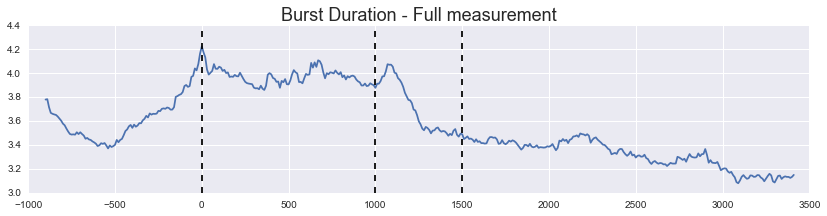

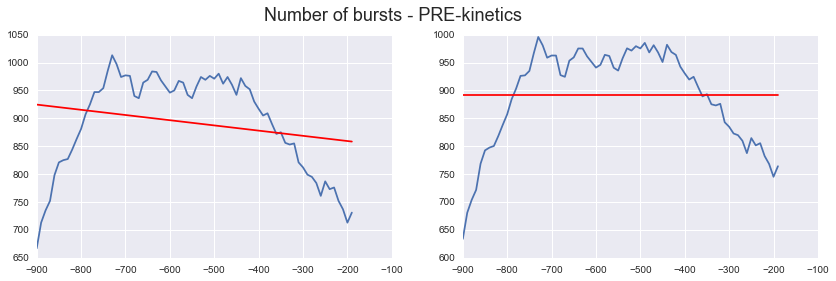

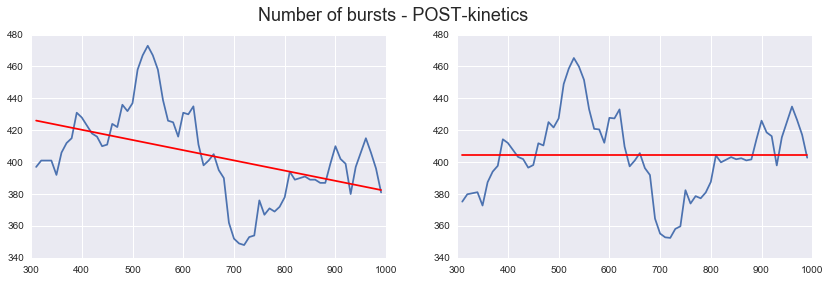

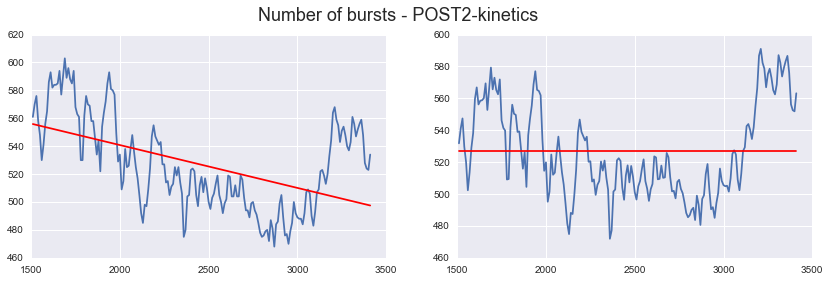

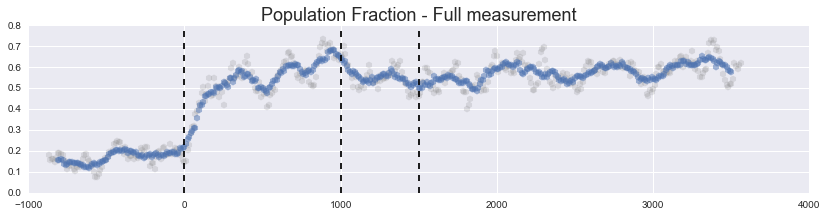

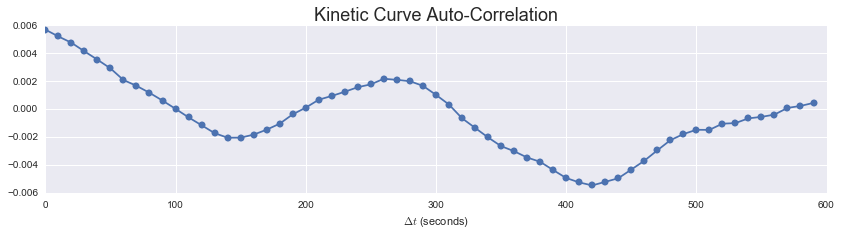

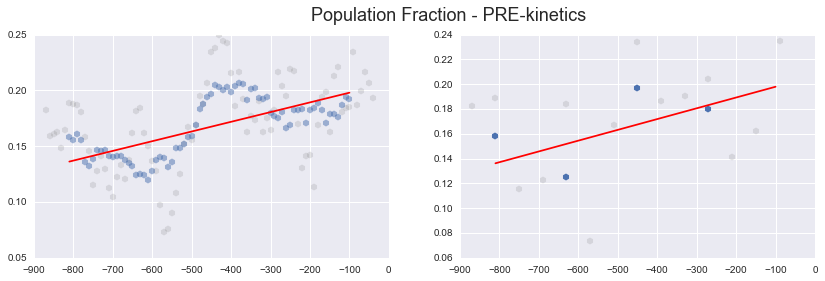

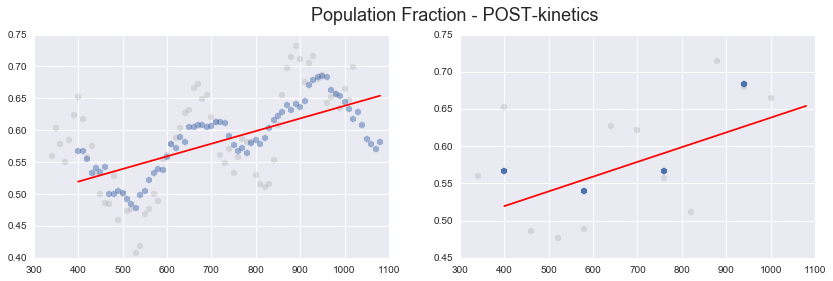

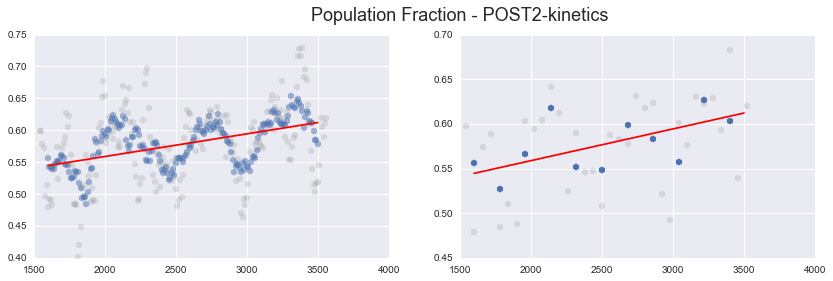

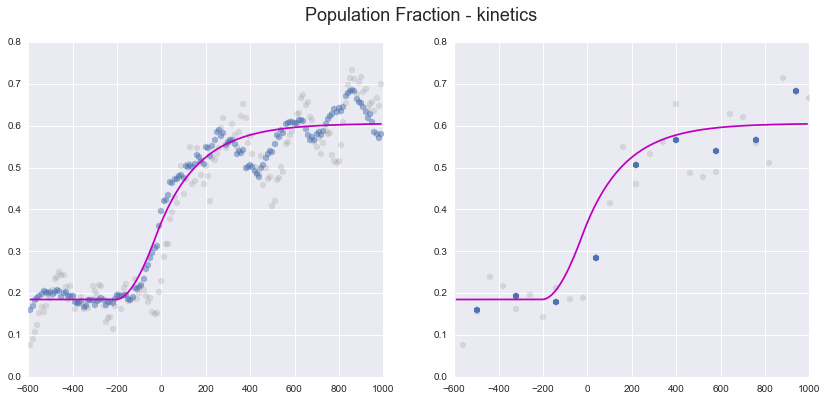

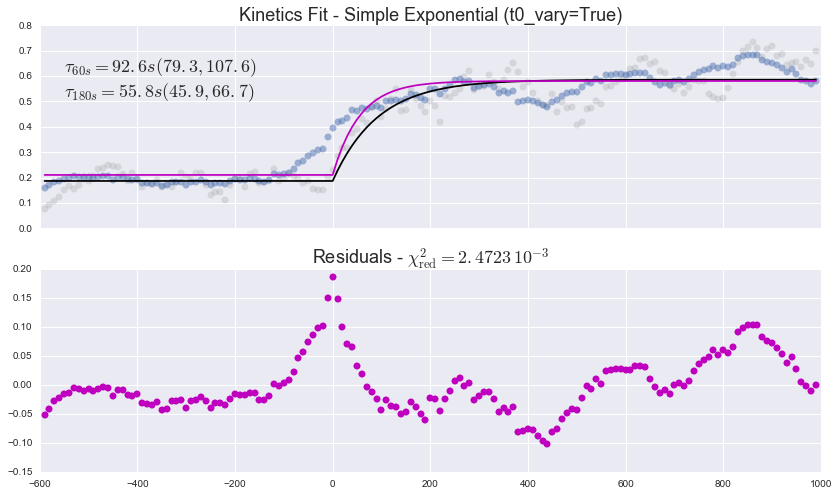

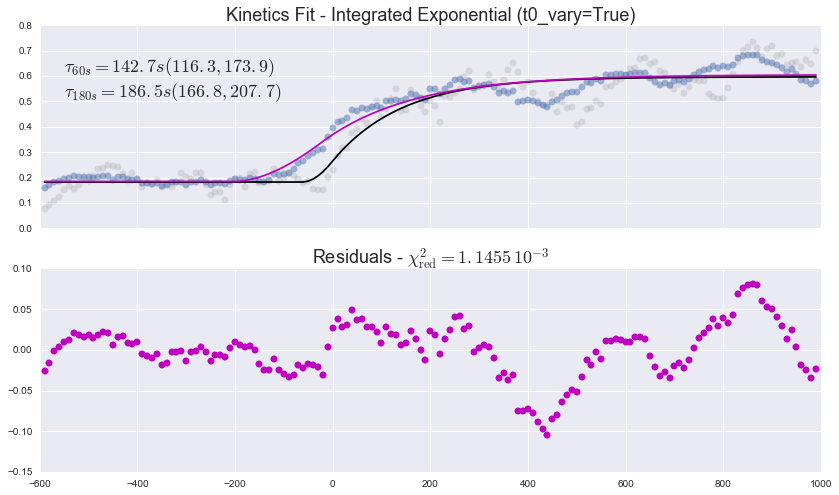

In [17]:
res, params = analysis.process(filenames[2], post = (300, 1000), post2_start=1500)

# Measurement 3 - control

  PRE Number of bursts (detrended):  1513.1 MEAN,  3061.8 VAR,  2.023 VAR/MEAN
 POST Number of bursts (detrended):  1026.3 MEAN,   128.3 VAR,  0.125 VAR/MEAN
POST2 Number of bursts (detrended):  1629.6 MEAN,  2839.4 VAR,  1.742 VAR/MEAN
  PRE Kinetics 30s:     3.109 STD, 2.724 STD detrended.
 POST Kinetics 30s:     1.046 STD, 0.473 STD detrended.
POST2 Kinetics 30s:     1.934 STD, 0.954 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=60s) = 117.3s  tau(w=180s) = 62.5s  Delta = 46.7%
 FIT  Window Exp (t0_vary=False):  tau(w=60s) = 165.7s  tau(w=180s) = 159.2s  Delta = 3.9%
 FIT  Simple Exp (t0_vary=True):  tau(w=60s) = 117.3s  tau(w=180s) = 62.5s  Delta = 46.7%
 FIT  Window Exp (t0_vary=True):  tau(w=60s) = 126.6s  tau(w=180s) = 98.0s  Delta = 22.6%


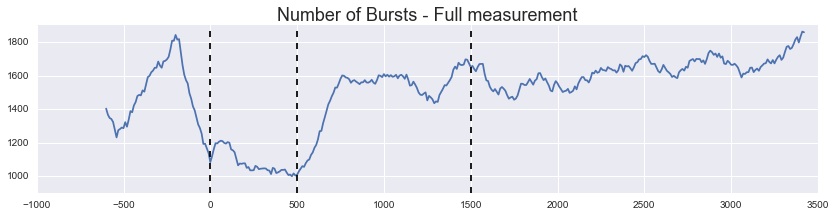

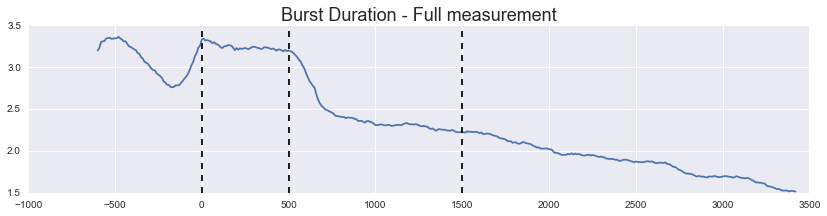

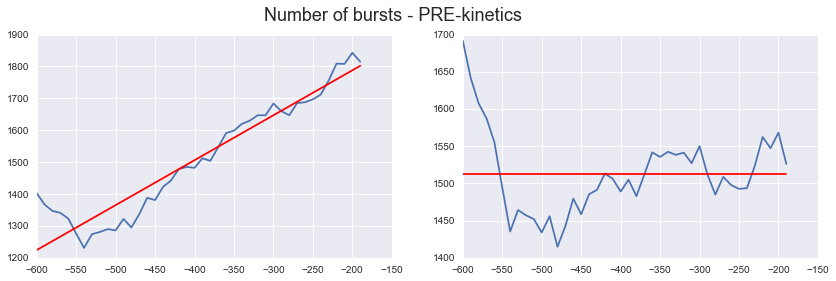

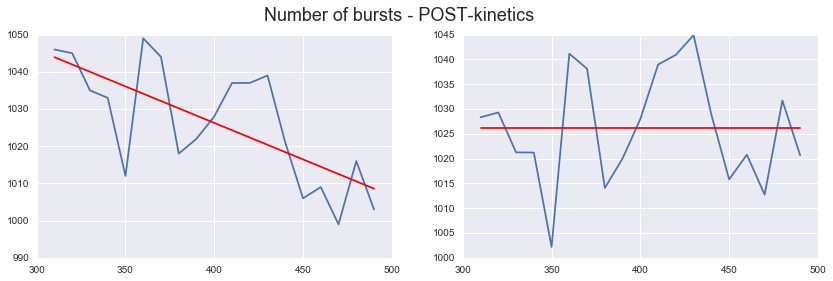

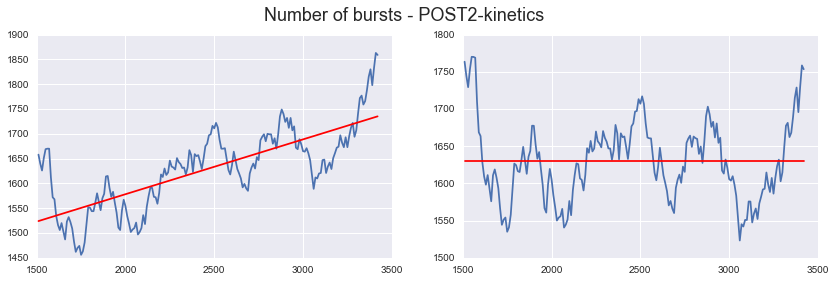

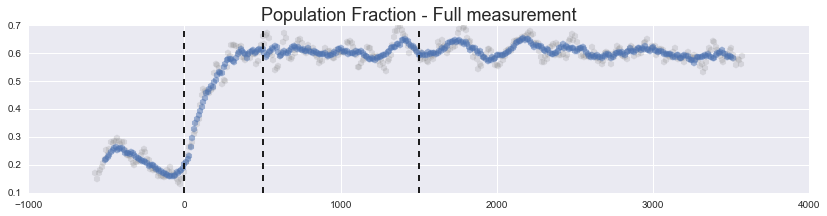

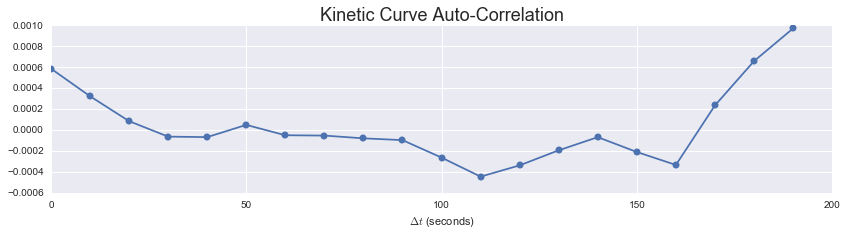

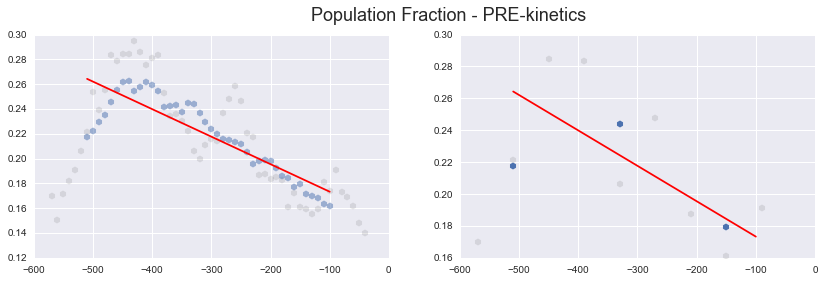

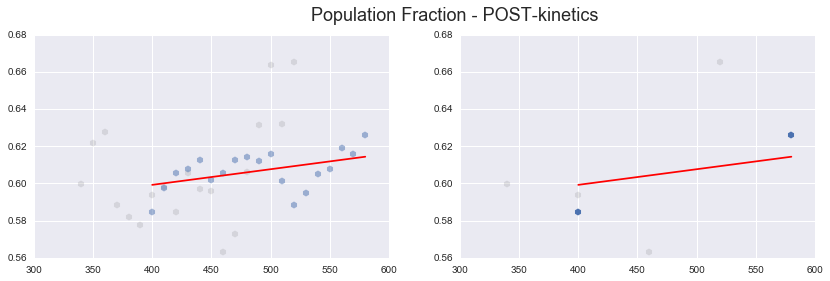

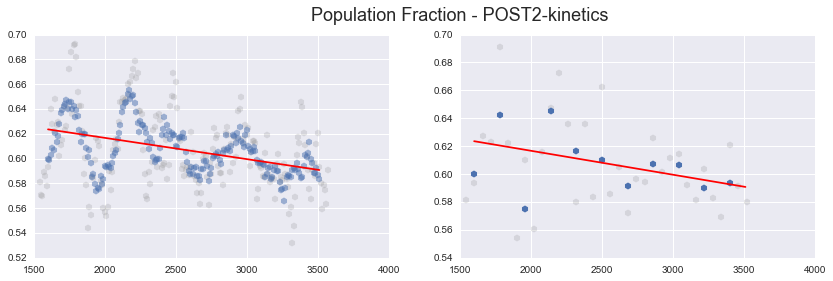

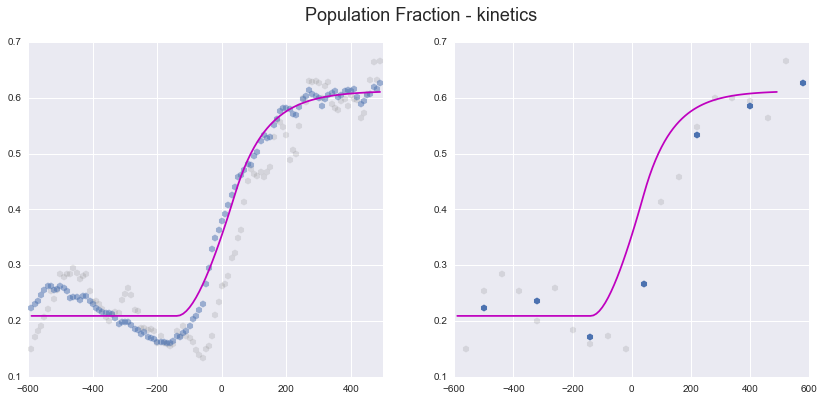

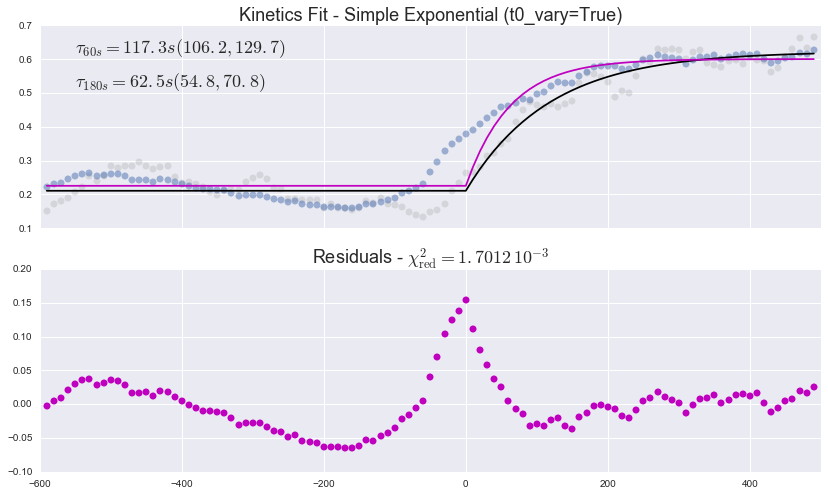

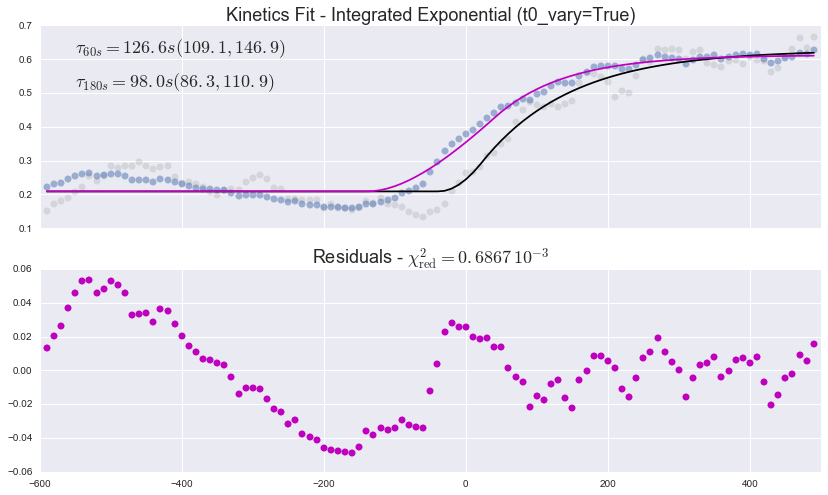

In [18]:
res, params = analysis.process(filenames[3], post = (300, 500), post2_start=1500)

# Measurement 4 - control

  PRE Number of bursts (detrended):   483.2 MEAN,   229.7 VAR,  0.475 VAR/MEAN
 POST Number of bursts (detrended):   453.3 MEAN,   160.8 VAR,  0.355 VAR/MEAN
POST2 Number of bursts (detrended):   683.2 MEAN,  1245.5 VAR,  1.823 VAR/MEAN
  PRE Kinetics 30s:     5.860 STD, 5.446 STD detrended.
 POST Kinetics 30s:     2.081 STD, 0.004 STD detrended.
POST2 Kinetics 30s:     2.801 STD, 0.890 STD detrended.


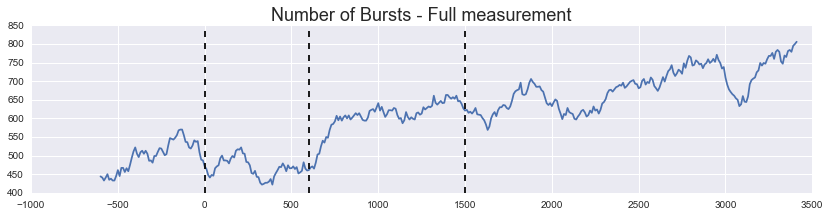

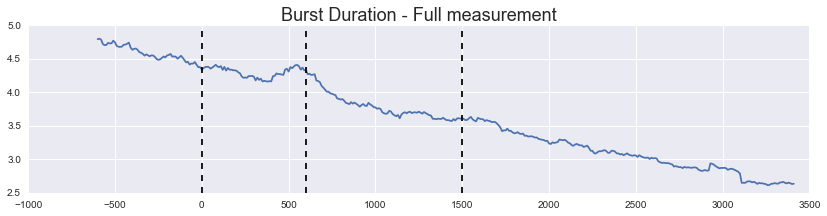

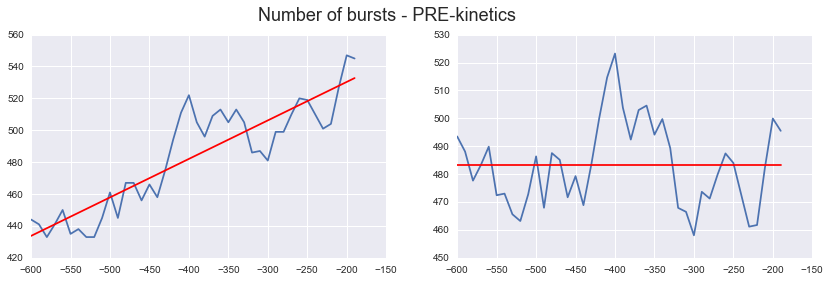

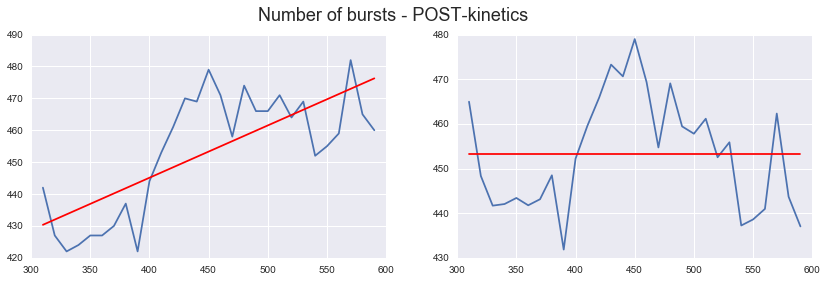

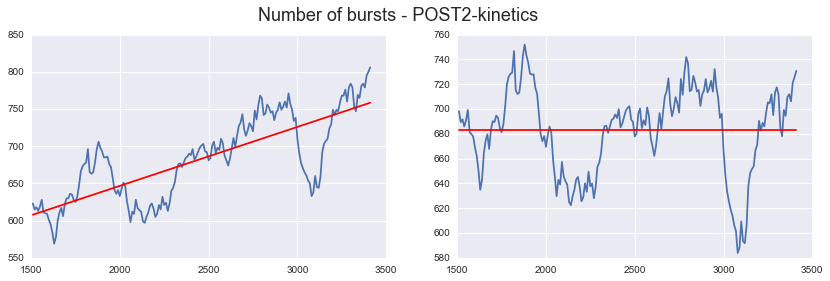

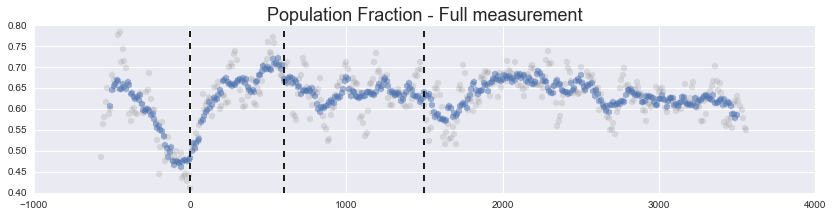

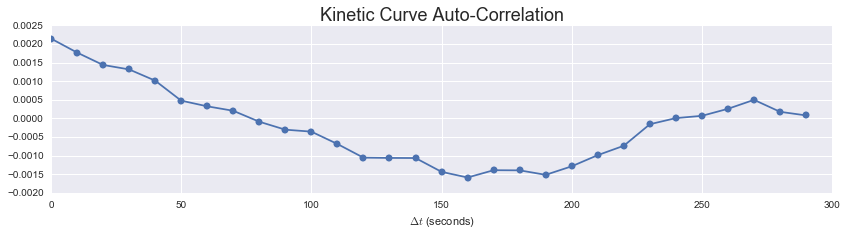

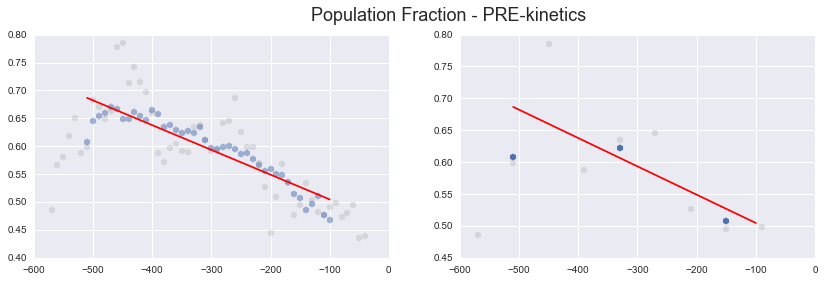

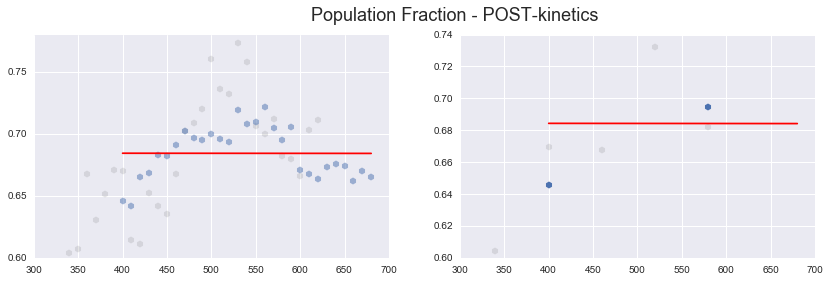

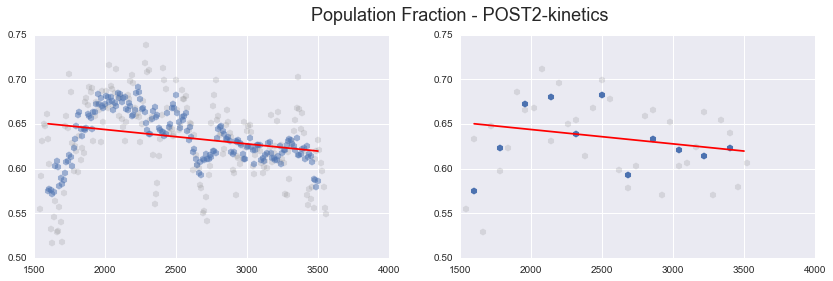

In [19]:
res, params = analysis.process(filenames[4], post = (300, 600), post2_start=1500, fit=False)

# Measurement 5 - control

  PRE Number of bursts (detrended):   223.9 MEAN,    77.2 VAR,  0.345 VAR/MEAN
 POST Number of bursts (detrended):   180.3 MEAN,    38.1 VAR,  0.211 VAR/MEAN
POST2 Number of bursts (detrended):   302.7 MEAN,   425.9 VAR,  1.407 VAR/MEAN
  PRE Kinetics 30s:     5.270 STD, 1.038 STD detrended.
 POST Kinetics 30s:     1.488 STD, 0.203 STD detrended.
POST2 Kinetics 30s:     3.836 STD, 2.831 STD detrended.


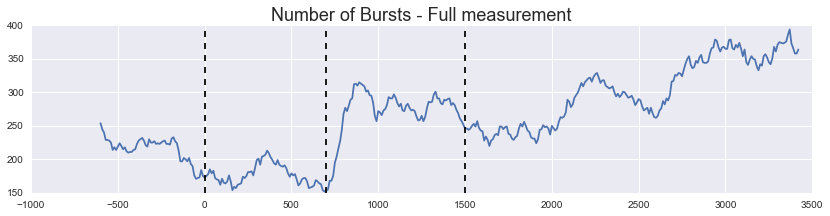

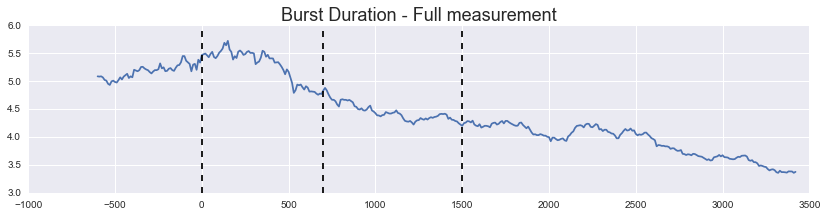

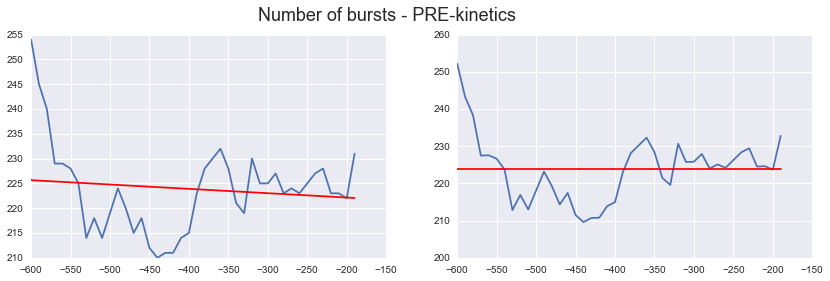

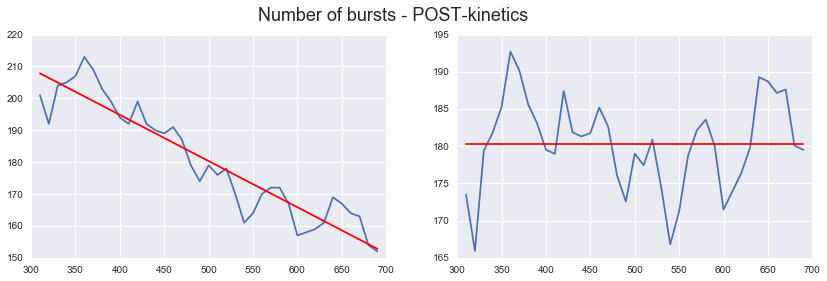

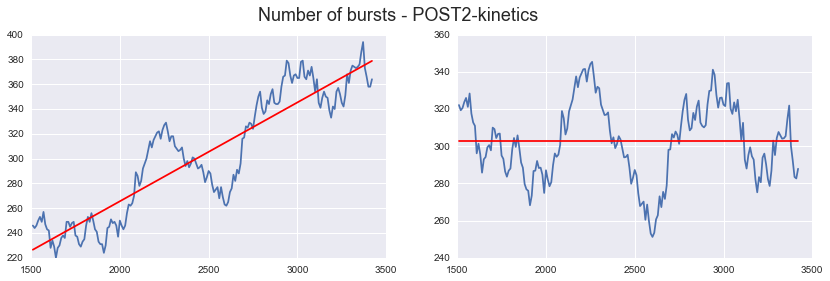

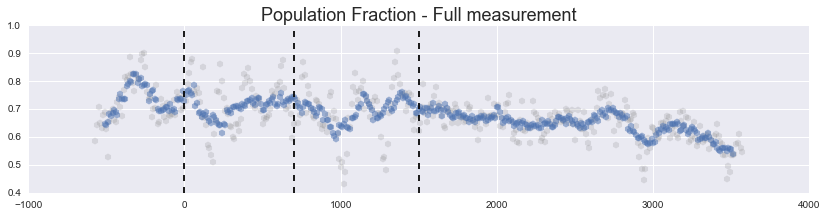

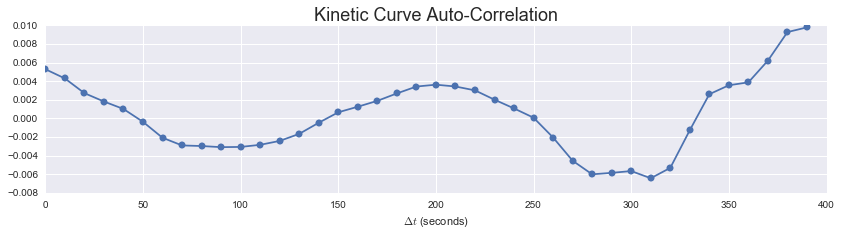

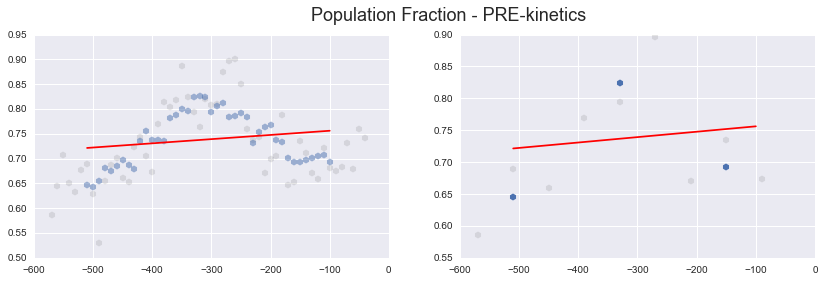

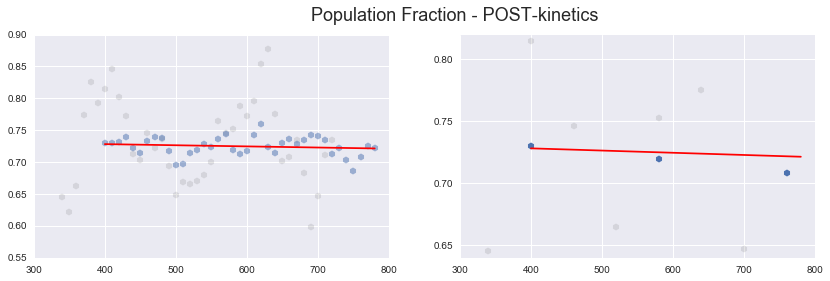

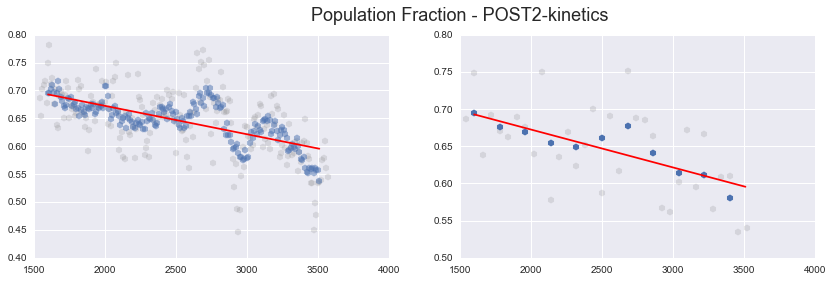

In [20]:
res, params = analysis.process(filenames[5], post = (300, 700), post2_start=1500, fit=False)

# Measurement 6 - control

  PRE Number of bursts (detrended):   314.7 MEAN,   981.0 VAR,  3.117 VAR/MEAN
 POST Number of bursts (detrended):   246.1 MEAN,   313.2 VAR,  1.273 VAR/MEAN
POST2 Number of bursts (detrended):   417.1 MEAN,   850.4 VAR,  2.039 VAR/MEAN
  PRE Kinetics 30s:     6.200 STD, 5.577 STD detrended.
 POST Kinetics 30s:     3.062 STD, 1.859 STD detrended.
POST2 Kinetics 30s:     2.412 STD, 0.085 STD detrended.


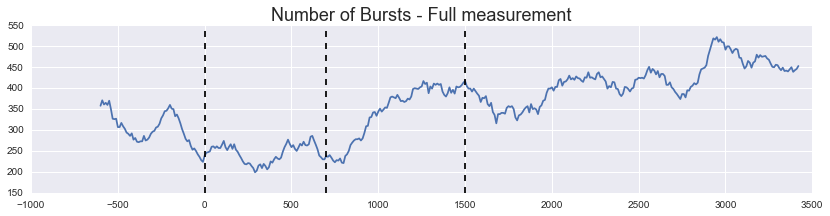

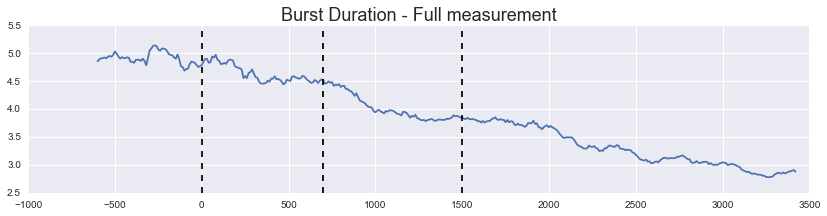

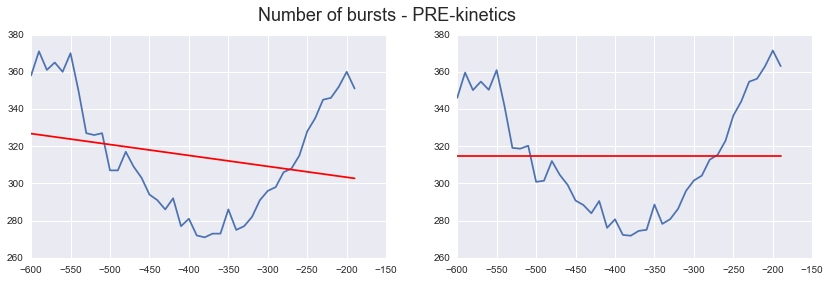

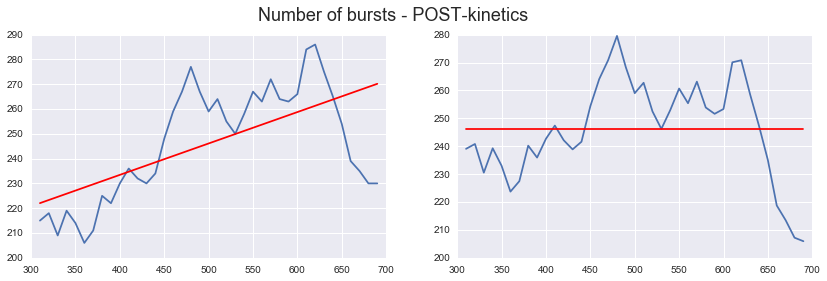

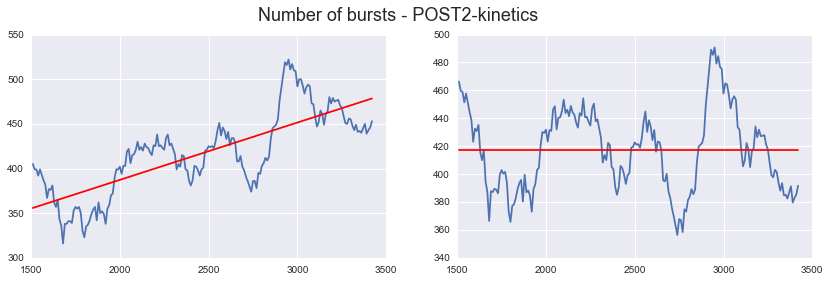

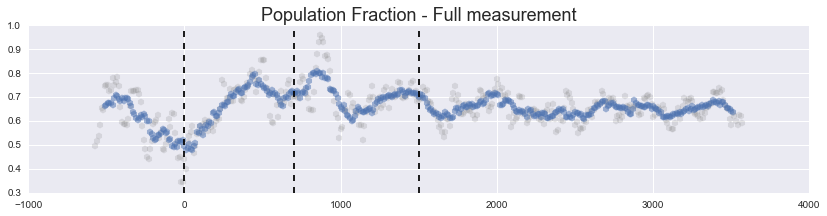

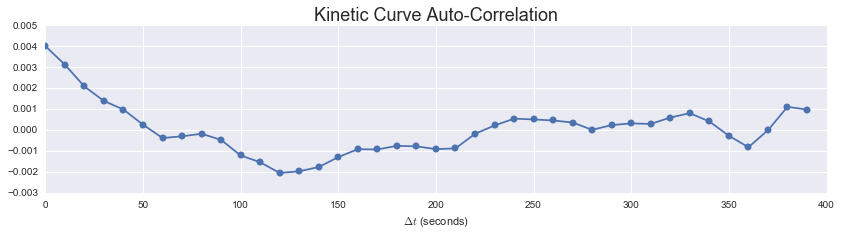

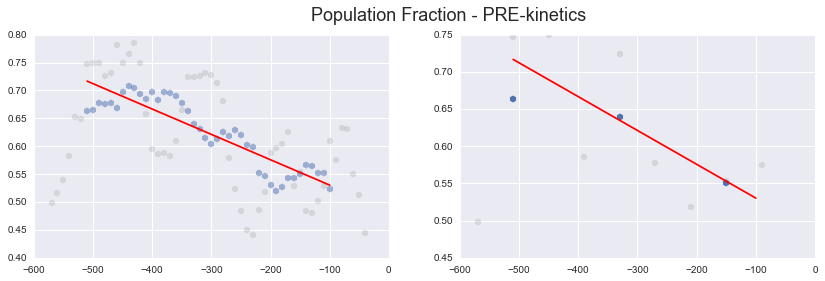

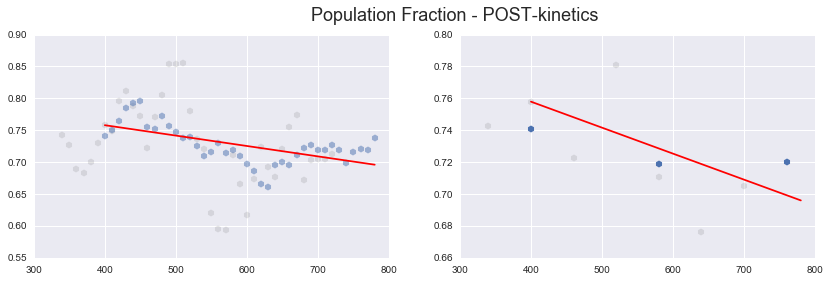

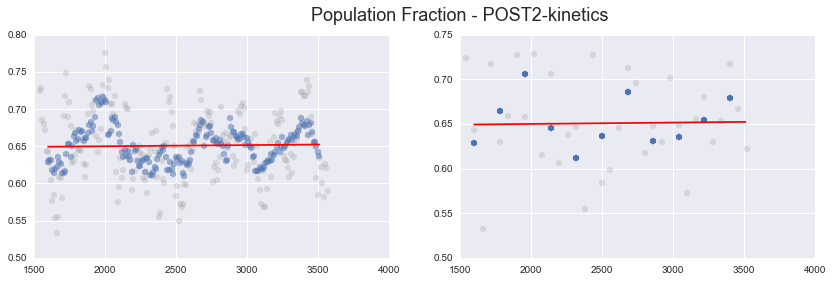

In [21]:
res, p = params = analysis.process(filenames[6], post = (300, 700), post2_start=1500, fit=False)

# Measurement 7 - control

  PRE Number of bursts (detrended):   312.3 MEAN,   294.7 VAR,  0.944 VAR/MEAN
 POST Number of bursts (detrended):   586.4 MEAN,   578.2 VAR,  0.986 VAR/MEAN
POST2 Number of bursts (detrended):   709.2 MEAN,   985.1 VAR,  1.389 VAR/MEAN
  PRE Kinetics 30s:     4.458 STD, 1.201 STD detrended.
 POST Kinetics 30s:     2.033 STD, 1.274 STD detrended.
POST2 Kinetics 30s:     1.974 STD, 0.010 STD detrended.


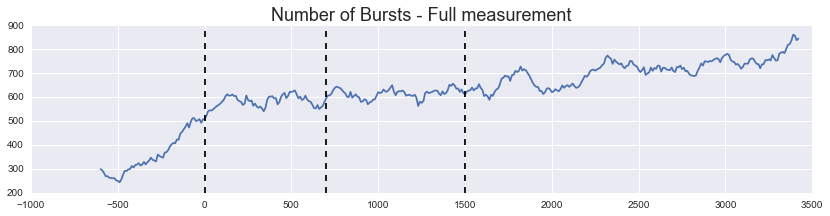

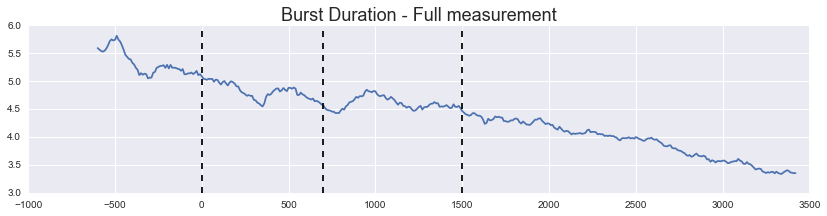

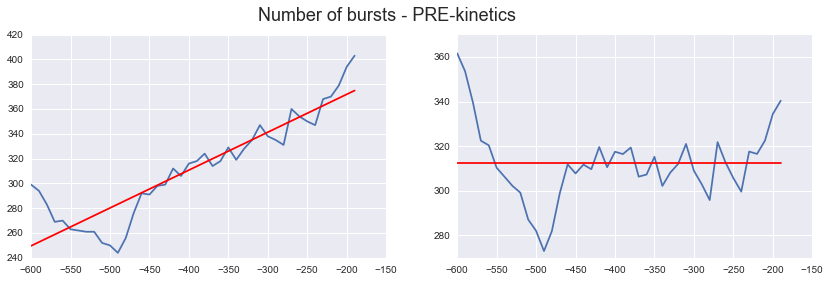

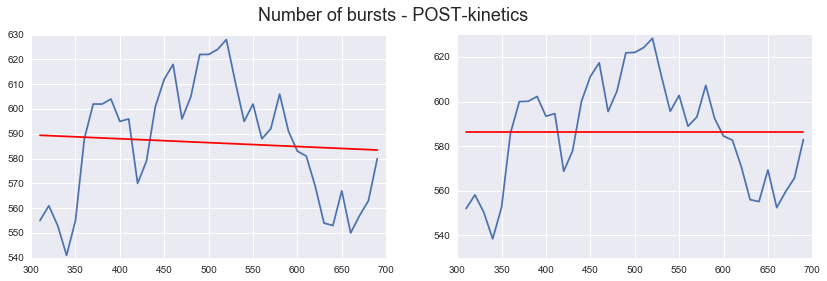

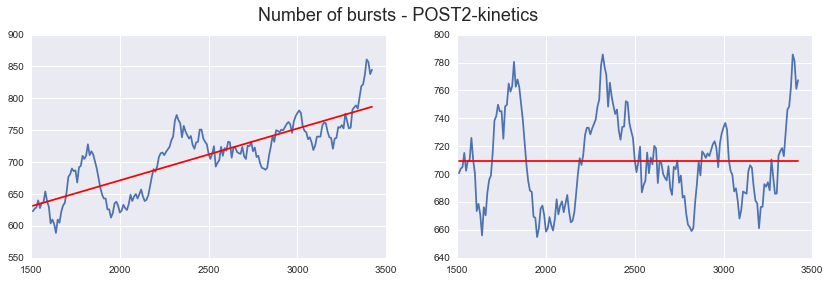

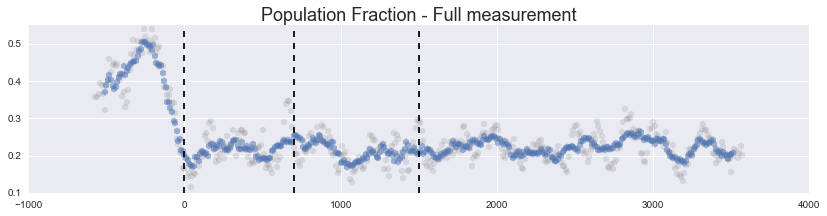

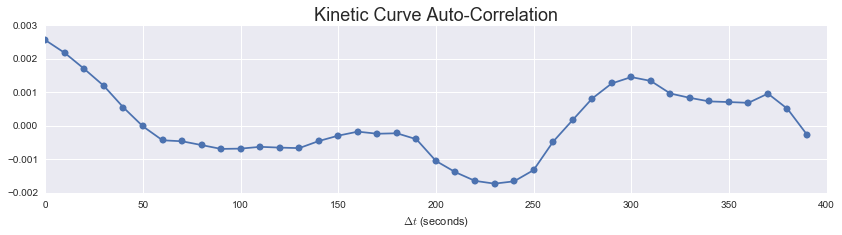

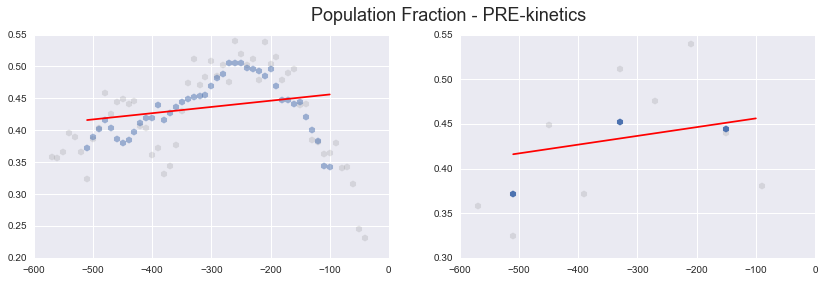

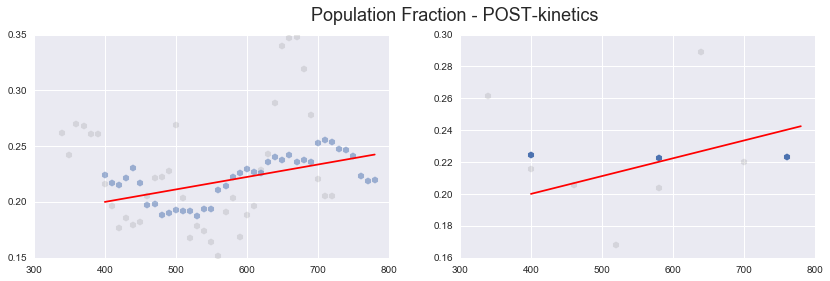

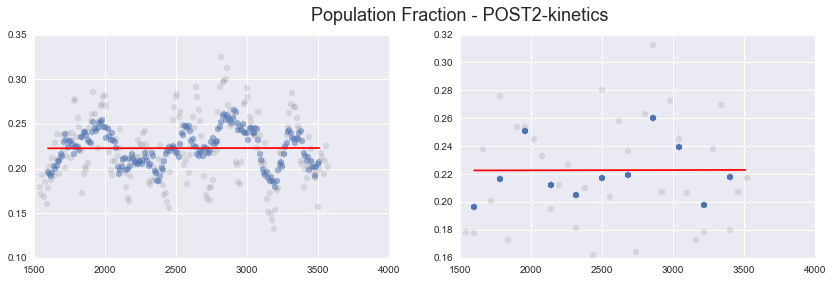

In [22]:
res, p = params = analysis.process(filenames[7], post = (300, 700), post2_start=1500, fit=False)

# Measurement 8 - control

  PRE Number of bursts (detrended):   168.2 MEAN,    62.3 VAR,  0.370 VAR/MEAN
 POST Number of bursts (detrended):   335.6 MEAN,    70.3 VAR,  0.209 VAR/MEAN
POST2 Number of bursts (detrended):   396.5 MEAN,   379.2 VAR,  0.956 VAR/MEAN
  PRE Kinetics 30s:     5.473 STD, 2.264 STD detrended.
 POST Kinetics 30s:     2.370 STD, 0.099 STD detrended.
POST2 Kinetics 30s:     2.421 STD, 0.571 STD detrended.


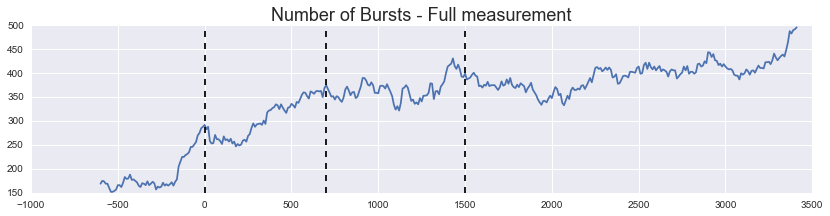

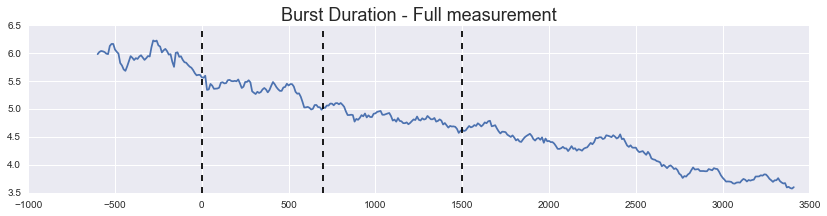

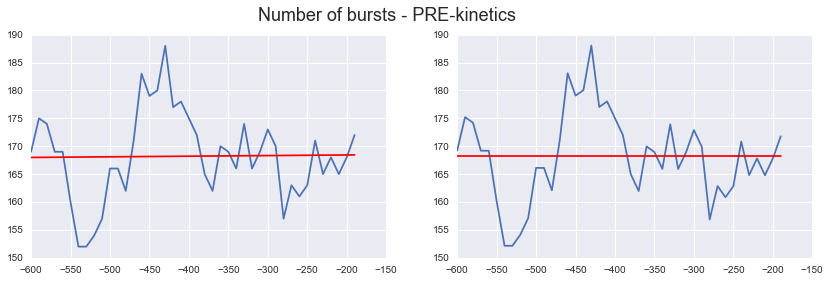

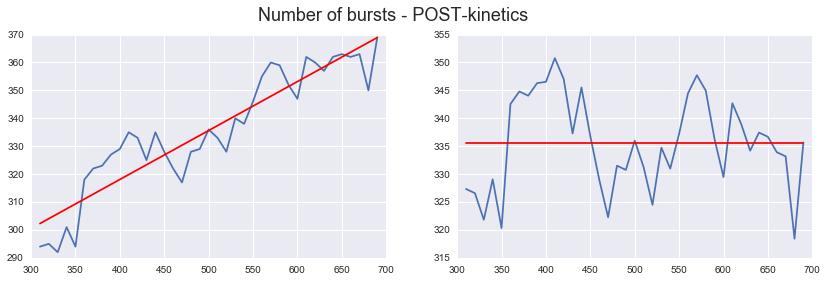

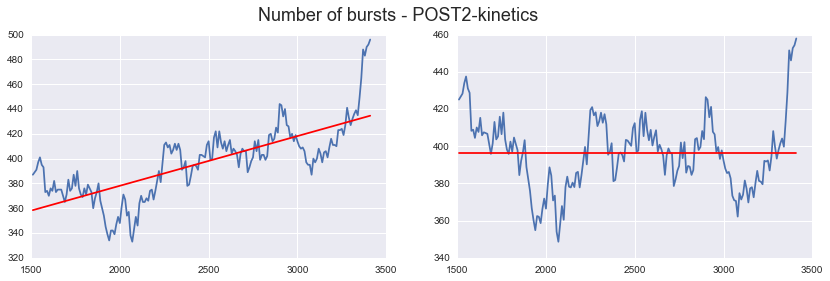

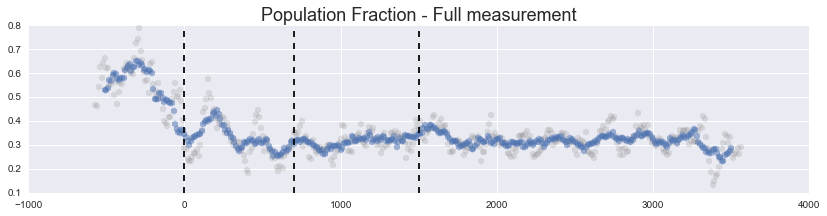

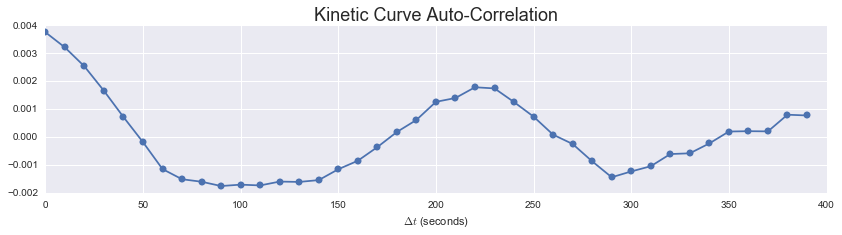

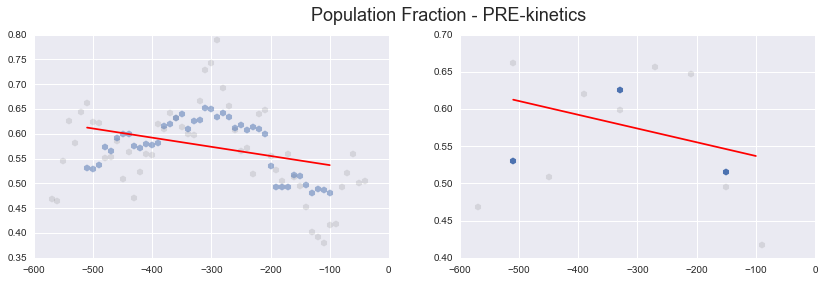

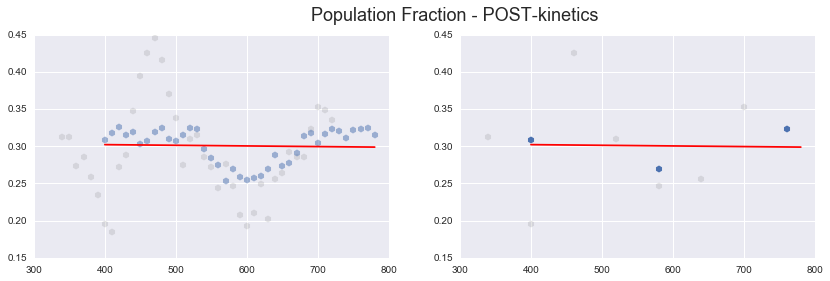

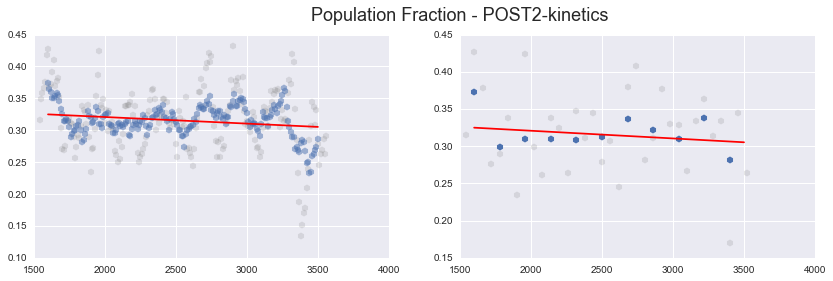

In [23]:
res, params = analysis.process(filenames[8], post = (300, 700), post2_start=1500, fit=False)